# Wine Inventory

There are a collection of wines that have been cataloged by wines we have purchased and consumed over the past few years: "onShelf.csv". The goal of this analysis is to clean up the inventory, observe the factors that contribute most to how much a wine is enjoyed, and use them to predict the rating for wines we have not tasted yet.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# creating a single dataset of all the wines

headers = ['Location Code', 'Location', 'Vintage', 'Region', 'Wine Name', 'Grape/Blend', 'Quantity', 
           'Rating', 'Unit Purchase Price', 'Type', 'Purchase Date']

df = pd.read_csv('onShelf.csv', names=headers, header=0, index_col=False)

df = df.reset_index(drop=True)

In [88]:
df.head()

,Location Code,Location,Vintage,Region,Wine Name,Grape/Blend,Quantity,Rating,Unit Purchase Price,Type,Purchase Date
0,TL1,Bar,2017.0,France,Domaine Lafage Bastide Miraflors Côtes du Rous...,Syrah/Granache,1.0,NaN,$14.25,Red,11/7/2020
1,TL2,Bar,2017.0,Italy,Scaia Paradiso,Corvina/Rondinella/Cabernet,1.0,4.0,$19.00,Red,5/30/2020
2,TL3,Bar,2016.0,Spain,Nubori Crianza Rioja,Tempranillo,1.0,4.0,$16.00,Red,11/23/2019
3,TL3,Bar,2016.0,Spain,Cyan Toro,Tempranillo,1.0,NaN,$16.50,Red,11/7/2020
4,TL4,Bar,2016.0,California,Sterling,Merlot,1.0,4.0,$-,Red,NaN


### Handling Missing Values

In [89]:
df.drop(df[df['Wine Name'].isna() == True].index, inplace=True)

In [90]:
df.isna().sum()

Location Code           0
Location                0
Vintage                 3
Region                  0
Wine Name               0
Grape/Blend             0
Quantity                0
Rating                 37
Unit Purchase Price     0
Type                    0
Purchase Date          12
dtype: int64

In [91]:
df['Vintage'] = df['Vintage'].fillna(0)

In [92]:
df = df.astype({'Quantity':'int', 'Vintage':'int'}) 

In [93]:
df.loc[68, 'Quantity'] = 0 # Mara - Drank last bottle
df.loc[23, 'Quantity'] = 1 # Chateau Labastide Orliac drank one

### Splitting and Encoding

In [94]:
# creating the training set
train = df[['Vintage', 'Region', 'Grape/Blend', 'Type', 'Rating']]
train = train.dropna(axis=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 1 to 92
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vintage      56 non-null     int32  
 1   Region       56 non-null     object 
 2   Grape/Blend  56 non-null     object 
 3   Type         56 non-null     object 
 4   Rating       56 non-null     float64
dtypes: float64(1), int32(1), object(3)
memory usage: 2.4+ KB


In [95]:
X = train[['Vintage', 'Region', 'Grape/Blend', 'Type']]
y = train[['Rating']]

In [143]:
# encoding
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

encoder = ce.OneHotEncoder(cols=['Region', 'Grape/Blend', 'Type'], use_cat_names=True, 
                           handle_unknown='return_nan',return_df=True)
X_train = encoder.fit_transform(X)
#X_train = np.array(X_train.astype('int'))
y_train = np.array(y.astype('int'))

y_train = y_train.reshape(-1)
list_ = list(X_train.columns.values)
list_

C:\Users\Grace\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


['Vintage',
 'Region_Italy',
 'Region_Spain',
 'Region_California',
 'Region_New Zealand',
 'Region_Australia',
 'Region_Argentina',
 'Region_Germany',
 'Region_Portugal',
 'Region_France',
 'Region_Chile',
 'Region_Slovania',
 'Region_Washington',
 'Region_South Africa',
 'Grape/Blend_Corvina/Rondinella/Cabernet',
 'Grape/Blend_Tempranillo',
 'Grape/Blend_Merlot',
 'Grape/Blend_Pinot Noir',
 'Grape/Blend_Tempranillo/Garnacha/Graciano',
 'Grape/Blend_Cabernet',
 'Grape/Blend_Barbera',
 'Grape/Blend_Malbec',
 'Grape/Blend_Dornfelder Sweet Red',
 'Grape/Blend_Roriz/Barroca/Aragonez/Pinot Noir/Touriga',
 'Grape/Blend_Merlot/Cabernet Franc/Tannat',
 'Grape/Blend_Carmanere Reserva',
 'Grape/Blend_Sweet Red',
 'Grape/Blend_Cava Sparking',
 'Grape/Blend_Prosecco Sparkling',
 'Grape/Blend_Torrontes',
 'Grape/Blend_Ribolla Gialla',
 'Grape/Blend_Syrah',
 'Grape/Blend_Gamay (slightly sweet)',
 'Grape/Blend_Bordeaux',
 'Grape/Blend_Chianti (Sangiovese)',
 'Grape/Blend_Aglianico ',
 'Grape/Blend_T

In [145]:
# creating test set
test = df[['Vintage', 'Region', 'Grape/Blend', 'Type', 'Rating']]
test = test[test.isnull().any(axis=1)]
test = test[['Vintage', 'Region', 'Grape/Blend', 'Type']]

X_test = encoder.fit_transform(test)
#X_test = X_test.iloc[:,:-1]
#X_test = np.array(X_test.astype('int'))
X_test
list2 = list(X_test.columns.values)
list2

C:\Users\Grace\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


['Vintage',
 'Region_France',
 'Region_Spain',
 'Region_California',
 'Region_Argentina',
 'Region_Italy',
 'Region_Portugal',
 'Region_Germany',
 'Region_New Zealand',
 'Region_Austria',
 'Region_South Africa',
 'Region_Chile',
 'Grape/Blend_Syrah/Granache',
 'Grape/Blend_Tempranillo',
 'Grape/Blend_Red blend',
 'Grape/Blend_Bordeaux',
 'Grape/Blend_Malbec/Cabernet/Petit Verdot',
 'Grape/Blend_Corvina',
 'Grape/Blend_Shiraz/Syrah/Grenache/Cinsault',
 'Grape/Blend_Tinta Barroca/Tinta Roriz/Touriga',
 'Grape/Blend_Syrah/Grenache/Malbec/Carignan',
 'Grape/Blend_Bobal',
 'Grape/Blend_Garnacha',
 'Grape/Blend_Falaghina',
 'Grape/Blend_Riesling',
 'Grape/Blend_Sauvignon Blanc',
 'Grape/Blend_Gruner Veltliner',
 'Grape/Blend_Savignon/Semilion',
 'Grape/Blend_Pais',
 'Grape/Blend_Bonarda',
 'Grape/Blend_Carmenere',
 'Grape/Blend_Cabernet',
 'Grape/Blend_Pinot Noir',
 'Grape/Blend_Barbera',
 'Grape/Blend_Sangiovese',
 'Grape/Blend_Merlot/Cabernet S/Petit Verdot/Cabernet Franc',
 'Grape/Blend_C

In [146]:
for item in list_:
    if item in list2:
        continue
    else:
        print(item)

Region_Australia
Region_Slovania
Region_Washington
Grape/Blend_Corvina/Rondinella/Cabernet
Grape/Blend_Merlot
Grape/Blend_Tempranillo/Garnacha/Graciano
Grape/Blend_Malbec
Grape/Blend_Dornfelder Sweet Red
Grape/Blend_Roriz/Barroca/Aragonez/Pinot Noir/Touriga
Grape/Blend_Merlot/Cabernet Franc/Tannat
Grape/Blend_Carmanere Reserva
Grape/Blend_Sweet Red
Grape/Blend_Cava Sparking
Grape/Blend_Prosecco Sparkling
Grape/Blend_Torrontes
Grape/Blend_Ribolla Gialla
Grape/Blend_Syrah
Grape/Blend_Gamay (slightly sweet)
Grape/Blend_Chianti (Sangiovese)
Grape/Blend_Tempranillo/Graziano
Grape/Blend_Carignan/Syrah/Grenache/Mouvedre
Grape/Blend_Valpolicella Ripasso
Grape/Blend_Chianti (Sangiovese/Malvasia Nera/Colorino/Merlot
Grape/Blend_Tempranillo/garnacha/mazuelo/graciano
Grape/Blend_Syrah/Mourverde/Carignan/Tannat/Grenache/Cinsault
Grape/Blend_Douro
Grape/Blend_Merlot/Cabernet/Malbec
Grape/Blend_Carignan/Syrah/Grenache
Grape/Blend_Mencia
Grape/Blend_Trincadeira/Aragonez/Syrah


### Visualization

<AxesSubplot:xlabel='Vintage', ylabel='Rating'>

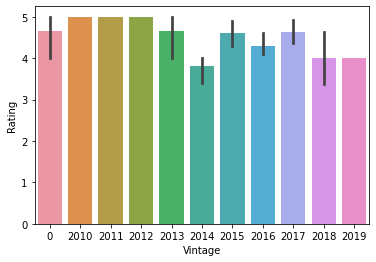

In [98]:
import seaborn as sns
%matplotlib inline 

sns.barplot(x='Vintage', y='Rating', data=train)

seaborn.axisgrid.FacetGrid

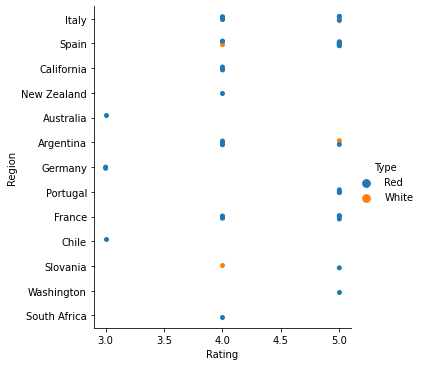

In [99]:
fig_lvl = sns.catplot(data=train, x='Rating', y='Region', hue='Type')
type(fig_lvl)

seaborn.axisgrid.FacetGrid

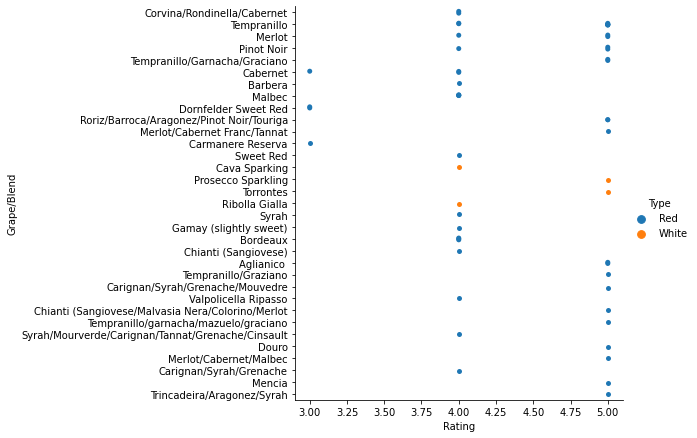

In [100]:
fig_blend = sns.catplot(data=train, x='Rating', y='Grape/Blend', hue='Type', height=6, aspect=1.5)
type(fig_blend)

### Creating the Model

In [101]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [119]:
regressor.predict(X_test)

ValueError: X has 44 features, but DecisionTreeRegressor is expecting 49 features as input.

In [129]:
X_train.shape

(56, 49)

In [126]:
X_test.reshape()

ValueError: cannot reshape array of size 1628 into shape (34,49)

In [133]:
X_test.shape

(37, 44)

In [130]:
X_train.size

2744